In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [159]:
#Read the csv from the web source
wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data",
                   sep=",",header=None)
wine.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [160]:
#Naming all the columns based on the source information
wine.columns=["Labels","Alcohol","Malic_acid","Ash","Alca_ash","Magnesium","phenols",
           "Flavanoids","Nonflav_phenols","Proanthocyanins",
           "Color_int","Hue","diluted_wines","Proline"]
print(wine.columns)
wine.head(2)

Index(['Labels', 'Alcohol', 'Malic_acid', 'Ash', 'Alca_ash', 'Magnesium',
       'phenols', 'Flavanoids', 'Nonflav_phenols', 'Proanthocyanins',
       'Color_int', 'Hue', 'diluted_wines', 'Proline'],
      dtype='object')


,Labels,Alcohol,Malic_acid,Ash,Alca_ash,Magnesium,phenols,Flavanoids,Nonflav_phenols,Proanthocyanins,Color_int,Hue,diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [167]:
#Assign Target labels to a new table
y=wine['Labels']
print("Target table size is",y.shape)
y.head(5)

Target table size is (178,)


0    1
1    1
2    1
3    1
4    1
Name: Labels, dtype: int64

In [166]:
#Assign Predictor variables to X table
X=wine.ix[:,1:]
print("Predictor variables size is ", X.shape)
X.head(5)

Predictor variables size is  (178, 13)


,Alcohol,Malic_acid,Ash,Alca_ash,Magnesium,phenols,Flavanoids,Nonflav_phenols,Proanthocyanins,Color_int,Hue,diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


##Problem 1-a: Mean, Variances, confidence Interval:

In [168]:
#Split the train set, test set, train class, test class
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, #Predictor Variables
                                                 y, #Class labels
                                                 stratify=y, #data is split in a stratified fashion, using this as the class labels
                                                 test_size=0.34,#Test size is set as 34% of entire set
                                                 random_state=2) # Set the randon state for spliting data  in same order

In [169]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(117, 13)
(61, 13)
(117,)
(61,)


In [171]:
#Import Desision Tree, Naive Bayes , K-Nearest Neighors from sklearn Library
from sklearn import neighbors, tree, naive_bayes

####Repeat 100 times on Holdout Partition and Decision Tree Model to calculate their Means, Variances, Confidence Interval

In [172]:
n_times=100 #Preset 100 times trial 
train_score_lst=[] #Preset the Train score list
test_score_lst=[] #Preset the Test score list

for i in range(1,n_times+1):

    #Split the train set, test set, train class, test class
    from sklearn.cross_validation import train_test_split
    x_train,x_test,y_train,y_test = train_test_split(X, #Predictor Variables
                                                     y, #Class labels
                                                     stratify=y, #data is split in a stratified fashion, using this as the class labels
                                                     test_size=0.34,#Test size is set as 34% of entire set
                                                     random_state=i) # Set the randon state for spliting data  in same order

    #Set up Decision Tree classifier with the optimal setting from Assignment #1
    treeclf = tree.DecisionTreeClassifier(criterion = "gini", 
                                          random_state = 28,
                                          max_depth=3, 
                                          min_samples_leaf=2)
    #Plug in the train dataset with target class
    treeclf = treeclf.fit(x_train, y_train)
    #Predict y value on testing data
    y_pre = treeclf.predict(x_test)

    #Calculate the Accuracy Score of the Training and Testing Set
    train_score_lst.append(treeclf.score(x_train, y_train))
    test_score_lst.append(accuracy_score(y_test, y_pre))
    


In [202]:
#Creating Confusion Matrix Decision Tree Model
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pre)

array([[20,  0,  0],
       [ 1, 23,  0],
       [ 0,  0, 17]])

####Calculate the Means of Training and Testing Data

In [174]:
train_score_lst_DT = train_score_lst
test_score_lst_DT = test_score_lst

train_mean=np.mean(np.array(train_score_lst))
test_mean=np.mean(np.array(test_score_lst))

print("Decision Tree Result:")
print("Mean of Accuracy of Training Data is ",round(train_mean*100,2),'%')
print("Mean of Accuracy of Testing Data is ",round(test_mean*100,2),'%')

Decision Tree Result:
Mean of Accuracy of Training Data is  97.89 %
Mean of Accuracy of Testing Data is  90.0 %


####Calculate the Variances of Training and Testing Data

In [175]:
train_var = np.var(np.array(train_score_lst))
test_var = np.var(np.array(test_score_lst))

print("Decision Tree Result:")
print("Variance of Accuracy of Training Data is ",train_var)
print("Variance of Accuracy of Testing Data is ",test_var)

Decision Tree Result:
Variance of Accuracy of Training Data is  0.000266571699905
Variance of Accuracy of Testing Data is  0.00204514915345


####Confidence Interval

In [176]:
#p,q, n values setting
p=train_mean
q=1-p
n=len(x_train)

print("Decision Tree Result:")

#95% C.I.
z=1.96
ci_left, ci_right = (p)-(z*np.sqrt(p*q/n)), (p)+(z*np.sqrt(p*q/n))
print("95 Percent Confidence Interval of Training Data is (%0.3f,%0.3f)"%(ci_left,ci_right))

#90% C.I.
z=1.65
ci_left, ci_right = (p)-(z*np.sqrt(p*q/n)), (p)+(z*np.sqrt(p*q/n))
print("90 Percent Confidence Interval of Training Data is (%0.3f,%0.3f)"%(ci_left,ci_right))

#80%C.I.
z=1.28
ci_left, ci_right = (p)-(z*np.sqrt(p*q/n)), (p)+(z*np.sqrt(p*q/n))
print("80 Percent Confidence Interval of Training Data is (%0.3f,%0.3f)"%(ci_left,ci_right))

Decision Tree Result:
95 Percent Confidence Interval of Training Data is (0.953,1.005)
90 Percent Confidence Interval of Training Data is (0.957,1.001)
80 Percent Confidence Interval of Training Data is (0.962,0.996)


In [177]:
#p,q, n values setting
p=test_mean
q=1-p
n=len(x_test)

print("Decision Tree Result:")

#95% C.I.
z=1.96
ci_left, ci_right = (p)-(z*np.sqrt(p*q/n)), (p)+(z*np.sqrt(p*q/n))
print("95 Percent Confidence Interval of Testing Data is (%0.3f,%0.3f)"%(ci_left,ci_right))

#90% C.I.
z=1.65
ci_left, ci_right = (p)-(z*np.sqrt(p*q/n)), (p)+(z*np.sqrt(p*q/n))
print("90 Percent Confidence Interval of Testing Data is (%0.3f,%0.3f)"%(ci_left,ci_right))

#80%C.I.
z=1.28
ci_left, ci_right = (p)-(z*np.sqrt(p*q/n)), (p)+(z*np.sqrt(p*q/n))
print("80 Percent Confidence Interval of Testing Data is (%0.3f,%0.3f)"%(ci_left,ci_right))

Decision Tree Result:
95 Percent Confidence Interval of Testing Data is (0.825,0.975)
90 Percent Confidence Interval of Testing Data is (0.837,0.963)
80 Percent Confidence Interval of Testing Data is (0.851,0.949)


####Repeat 100 times on Holdout Partition and Naive Bayes Model to calculate their Means, Variances, Confidence Interval

In [200]:
n_times=100 #Preset 35 times trial 
train_score_lst=[] #Preset the Train score list
test_score_lst=[] #Preset the Test score list

for i in range(1,n_times+1):

    #Split the train set, test set, train class, test class
    from sklearn.cross_validation import train_test_split
    x_train,x_test,y_train,y_test = train_test_split(X, #Predictor Variables
                                                     y, #Class labels
                                                     stratify=y, #data is split in a stratified fashion, using this as the class labels
                                                     test_size=0.34,#Test size is set as 34% of entire set
                                                     random_state=i) # Set the randon state for spliting data  in same order

   #Set up Naive Bayes classifier with ALL default setting
    nbclf = naive_bayes.GaussianNB()
    #Plug in the 66% of training set of data
    nbclf=nbclf.fit(x_train,y_train)
    #Predict y value on testing data
    y_pre = nbclf.predict(x_test)

    #Calculate the Accuracy Score of the Training and Testing Set
    train_score_lst.append(nbclf.score(x_train, y_train))
    test_score_lst.append(accuracy_score(y_test, y_pre))

In [201]:
#Creating Confusion Matrix Naive Bayes Model
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pre)

array([[20,  0,  0],
       [ 1, 23,  0],
       [ 0,  0, 17]])

####Calculate the Means of Training and Testing Data

In [179]:
train_score_lst_nb = train_score_lst
test_score_lst_nb = test_score_lst

train_mean=np.mean(np.array(train_score_lst))
test_mean=np.mean(np.array(test_score_lst))

print("Naive Bayes Classifer Result:")
print("Mean of Accuracy of Training Data is ",round(train_mean*100,2),'%')
print("Mean of Accuracy of Testing Data is ",round(test_mean*100,2),'%')

Naive Bayes Classifer Result:
Mean of Accuracy of Training Data is  98.43 %
Mean of Accuracy of Testing Data is  97.57 %


####Calculate the Variances of Training and Testing Data

In [180]:
train_var = np.var(np.array(train_score_lst))
test_var = np.var(np.array(test_score_lst))

print("Naive Bayes Classifer Result:")
print("Variance of Accuracy of Training Data is ",train_var)
print("Variance of Accuracy of Testing Data is ",test_var)

Naive Bayes Classifer Result:
Variance of Accuracy of Training Data is  7.1181240412e-05
Variance of Accuracy of Testing Data is  0.000249825315775


####Confidence Interval

In [183]:
#p,q, n values setting
p=train_mean
q=1-p
n=len(x_train)

print("Naive Bayes Result:")

#95% C.I.
z=1.96
ci_left, ci_right = (p)-(z*np.sqrt(p*q/n)), (p)+(z*np.sqrt(p*q/n))
print("95 Percent Confidence Interval of Training Data is (%0.3f,%0.3f)"%(ci_left,ci_right))

#90% C.I.
z=1.65
ci_left, ci_right = (p)-(z*np.sqrt(p*q/n)), (p)+(z*np.sqrt(p*q/n))
print("90 Percent Confidence Interval of Training Data is (%0.3f,%0.3f)"%(ci_left,ci_right))

#80%C.I.
z=1.28
ci_left, ci_right = (p)-(z*np.sqrt(p*q/n)), (p)+(z*np.sqrt(p*q/n))
print("80 Percent Confidence Interval of Training Data is (%0.3f,%0.3f)"%(ci_left,ci_right))

Naive Bayes Result:
95 Percent Confidence Interval of Training Data is (0.962,1.007)
90 Percent Confidence Interval of Training Data is (0.965,1.003)
80 Percent Confidence Interval of Training Data is (0.970,0.999)


In [184]:
#p,q, n values setting
p=test_mean
q=1-p
n=len(x_test)

print("Naive Bayes Result:")

#95% C.I.
z=1.96
ci_left, ci_right = (p)-(z*np.sqrt(p*q/n)), (p)+(z*np.sqrt(p*q/n))
print("95 Percent Confidence Interval of Testing Data is (%0.3f,%0.3f)"%(ci_left,ci_right))

#90% C.I.
z=1.65
ci_left, ci_right = (p)-(z*np.sqrt(p*q/n)), (p)+(z*np.sqrt(p*q/n))
print("90 Percent Confidence Interval of Testing Data is (%0.3f,%0.3f)"%(ci_left,ci_right))

#80%C.I.
z=1.28
ci_left, ci_right = (p)-(z*np.sqrt(p*q/n)), (p)+(z*np.sqrt(p*q/n))
print("80 Percent Confidence Interval of Testing Data is (%0.3f,%0.3f)"%(ci_left,ci_right))

Naive Bayes Result:
95 Percent Confidence Interval of Testing Data is (0.937,1.014)
90 Percent Confidence Interval of Testing Data is (0.943,1.008)
80 Percent Confidence Interval of Testing Data is (0.951,1.001)


##Problem-1-b: Paired t-test

Paired t-test with the following Hypothesis:

P0 (Null): Mean Accuracy of TWO Classifier Models are the SAME

Pa (Alternative): Mean Accuracy of TWO Models are different from each other

Based on the calculation below, we could summarize as the following:

Training Set: The t-statistics is -2.915 with df=99 (Degree of Freedom) which means that the corresponding p-value is greater 0.25. With assumed 95% Confidence Interval, we could reject he P0 Null hypothesis since the p-value is less than 0.025. In other words, we have strong evidence that Mean of Accuracy the TWO Training set is statistically significanly different from each other

Testing Set: The t-statistics is -15.73 with df=99 (Degree of Freedom) which means that the corresponding p-value is greater 3.24e-31. With assumed 95% Confidence Interval, we should reject he P0 Null hypothesis since the p-value is less than 0.025. In other words, we have strong evidence that Mean of Accuarcy the TWO Testing set is statistically significanly different from each other.

In [189]:
#Calculate Difference of Score of Training Data of the Decision Tree and Naive Bayes Models
diff_score = list(map(lambda x,y: x-y, train_score_lst_DT,train_score_lst_nb))

#Transform the Score lists into DataFrame
df = pd.DataFrame(list(zip(train_score_lst_DT,train_score_lst_nb,diff_score)), 
                  columns=['DT_train_score','nb_train_score','Score_Difference'])
print("Table Size is ",df.shape)
print(df.head(5))

#Calculate the t-test statistics and p-value for training set
from scipy import stats
t_stat, p_value = stats.ttest_ind(train_score_lst_DT,train_score_lst_nb,equal_var = False)
print("")
print("Training Set: t_statistic is %0.3f and p-value is %0.3f"% (t_stat, p_value))

Table Size is  (100, 3)
   DT_train_score  nb_train_score  Score_Difference
0        0.991453        0.982906          0.008547
1        0.991453        0.965812          0.025641
2        0.974359        0.982906         -0.008547
3        0.957265        0.974359         -0.017094
4        1.000000        0.991453          0.008547

Training Set: t_statistic is -2.915 and p-value is 0.004


In [194]:
#Calculate Difference of Score of Testing Data of the Decision Tree and Naive Bayes Models
diff_score = list(map(lambda x,y: x-y, test_score_lst_DT,test_score_lst_nb))

#Transform the Score lists into DataFrame
df = pd.DataFrame(list(zip(test_score_lst_DT,test_score_lst_nb,diff_score)), 
                  columns=['DT_test_score','nb_test_score','Score_Difference'])
print("Table Size is ",df.shape)
print(df.head(5))

#Calculate the t-test statistics and p-value for testing set
from scipy import stats
t_stat, p_value = stats.ttest_ind(test_score_lst_DT,test_score_lst_nb,equal_var = False)
print("")
print("Testing Set: t_statistic is %0.3f and p-value is %0.6f"% (t_stat, p_value))

Table Size is  (100, 3)
   DT_test_score  nb_test_score  Score_Difference
0       0.950820       0.983607         -0.032787
1       0.934426       0.967213         -0.032787
2       0.852459       0.967213         -0.114754
3       0.885246       0.950820         -0.065574
4       0.918033       0.983607         -0.065574

Testing Set: t_statistic is -15.730 and p-value is 0.000000


##Problem-2: Resubstitution Error and Generalization Error



In [204]:
#Import Desision Tree, Naive Bayes , K-Nearest Neighors
from sklearn import neighbors, tree, naive_bayes
from sklearn.metrics import accuracy_score

In [205]:
train_size_lst = np.arange(0.25,0.86,0.1) #Preset Size of Training Data
DT_train_score_lst=[] #Preset the Train score list
DT_test_score_lst=[] #Preset the Test score list

for i in train_size_lst:

    #Split the train set, test set, train class, test class
    from sklearn.cross_validation import train_test_split
    x_train,x_test,y_train,y_test = train_test_split(X, #Predictor Variables
                                                     y, #Class labels
                                                     stratify=y, #data is split in a stratified fashion, using this as the class labels
                                                     test_size=1-i,#Iterating the size of Training data set
                                                     random_state=28) # Set the randon state for spliting data  in same order

    #Set up Decision Tree classifier with the optimal setting from Assignment #1
    treeclf = tree.DecisionTreeClassifier(criterion = "gini", 
                                          random_state = 28,
                                          max_depth=3, 
                                          min_samples_leaf=2)
    #Plug in the train dataset with target class
    treeclf = treeclf.fit(x_train, y_train)
    #Predict y value on testing data
    y_pre = treeclf.predict(x_test)

    #Calculate the Accuracy Score of the Training and Testing Set
    DT_train_score_lst.append(treeclf.score(x_train, y_train))
    DT_test_score_lst.append(accuracy_score(y_test, y_pre))
    



In [206]:
train_size_lst = np.arange(0.25,0.86,0.1) #Preset Size of Training Data
nb_train_score_lst=[] #Preset the Train score list
nb_test_score_lst=[] #Preset the Test score list

for i in train_size_lst:

    #Split the train set, test set, train class, test class
    from sklearn.cross_validation import train_test_split
    x_train,x_test,y_train,y_test = train_test_split(X, #Predictor Variables
                                                     y, #Class labels
                                                     stratify=y, #data is split in a stratified fashion, using this as the class labels
                                                     test_size=1-i,#Iterating the size of Training data set
                                                     random_state=28) # Set the randon state for spliting data  in same order

   #Set up Naive Bayes classifier with ALL default setting
    nbclf = naive_bayes.GaussianNB()
    #Plug in the 66% of training set of data
    nbclf=nbclf.fit(x_train,y_train)
    #Predict y value on testing data
    y_pre = nbclf.predict(x_test)

    #Calculate the Accuracy Score of the Training and Testing Set
    nb_train_score_lst.append(nbclf.score(x_train, y_train))
    nb_test_score_lst.append(accuracy_score(y_test, y_pre))

In [207]:
#Generate the Accuracy table for Decision Tree and Naive Bayes Models
df2 = pd.DataFrame(list(zip(DT_train_score_lst, DT_test_score_lst,nb_train_score_lst,nb_test_score_lst)), 
             columns = ['DT_train_Acc','DT_test_Acc','nb_train_Acc','nb_test_Acc'],
            index = np.arange(0.25,0.86,0.1))
print("The size of Accuracy Table",df2.shape)
df2

The size of Accuracy Table (7, 4)


,DT_train_Acc,DT_test_Acc,nb_train_Acc,nb_test_Acc
0.25,0.954545,0.791045,0.977273,0.985075
0.35,0.967742,0.870690,0.983871,0.991379
0.45,0.987500,0.928571,0.975000,0.989796
0.55,0.989691,0.913580,0.979381,0.975309
0.65,0.991304,0.952381,0.982609,0.984127
0.75,0.992481,0.955556,0.984962,1.000000
0.85,0.993377,0.925926,0.986755,0.962963


In [208]:
#Generate the Error table for Decision Tree and Naive Bayes Models
df3=np.ones(df2.shape)
df3=pd.DataFrame(df3, index = np.arange(0.25,0.86,0.1) )
Err_df= pd.DataFrame(df3.values-df2.values, 
                     index= np.arange(0.25,0.86,0.1), 
                     columns = ['DT_Resubstition_Err',
                                'DT_Generalization_Err',
                                'nb_Resubstition_Err',
                                'nb_Generalization_Err'])
print(Err_df.shape)
Err_df

(7, 4)


,DT_Resubstition_Err,DT_Generalization_Err,nb_Resubstition_Err,nb_Generalization_Err
0.25,0.045455,0.208955,0.022727,0.014925
0.35,0.032258,0.129310,0.016129,0.008621
0.45,0.012500,0.071429,0.025000,0.010204
0.55,0.010309,0.086420,0.020619,0.024691
0.65,0.008696,0.047619,0.017391,0.015873
0.75,0.007519,0.044444,0.015038,0.000000
0.85,0.006623,0.074074,0.013245,0.037037


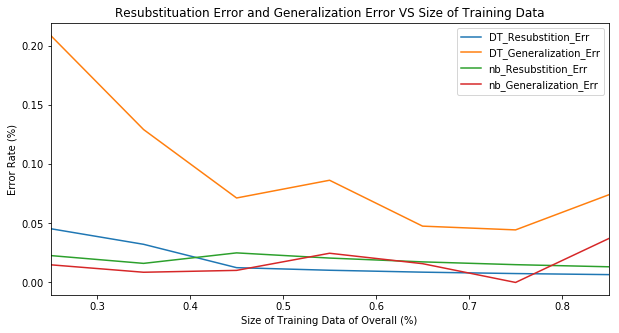

In [209]:
Err_df.plot(x=Err_df.index.values, figsize=(10,5))
plt.title("Resubstituation Error and Generalization Error VS Size of Training Data")
plt.xlabel("Size of Training Data of Overall (%)")
plt.ylabel("Error Rate (%)")
plt.show()

##Problem-2

Ans:

Based on the analysis below, we could observe that the Error Rate on the Training and Testing data are generally Higher when the size of Training data set is small. The Error Rates gradually decline when the size of Training data increases, especially happening in the training dataset (Blue: Decision Tree, Green: Naive Bayes). On the other hand, there is different on the testing data. The Generalization error (Error from Testing data) bounces back up when the size of Training data passes approximately 75%. The bounce-back incident is propably occured due to the over-fitting problem. When the size of Training set weight too much than the Testing data, the overfitting problem would be arised. Besides, we could also observe that the under-fitting problem occurs when the size of training data is too less. 

Also Based on the below, the Decision Tree model comes up a under-fitting appearance, The Generalization Error (from testing data) is 4-fold higher than the Resubstitution Error when the size of Training data is ONLY 25%. In this case, I believe that is normal because Decision Tree is sensitive to the size of Training and Testing data. The classification cases are built in the Tree, the accuracy of D.T. all depends on the number cases are built in the Tree, the more built-in cases, the more accurate result. On the contrary, the Naive Bayes model is built by the probabilities of occurance, so that it is NOT that sensitive to the size of Training data, so that we could see that the deficiency of errors between the training and testing data is not too far. 

##Problem-3-a: Convert the Class 2 and Class 3 into Class 0

In [232]:
wine.head()

,Labels,Alcohol,Malic_acid,Ash,Alca_ash,Magnesium,phenols,Flavanoids,Nonflav_phenols,Proanthocyanins,Color_int,Hue,diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [233]:
wine2=wine
#Convert Class 2 and 3 into 0. However, we keep the Class 1
wine2[wine2.Labels==2]=0
wine2[wine2.Labels==3]=0

In [234]:
#Recheck the number of Class labels
y = wine2['Labels']
y.value_counts()

0    119
1     59
Name: Labels, dtype: int64

In [235]:
X=wine2.ix[:,1:]
print("The size of the predictor variables are ",X.shape)
X.head(3)

The size of the predictor variables are  (178, 13)


,Alcohol,Malic_acid,Ash,Alca_ash,Magnesium,phenols,Flavanoids,Nonflav_phenols,Proanthocyanins,Color_int,Hue,diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


##Problem-3-b: ROC Curve

Ans:

Based on the Testing analysis (Plot 3a) below, I would first say that classification result is better than a Random model because the curve is above the Random line. The ROC curve is basically a straight line passing through from threshold 0 to 1. In this case, we could say that the Accuracy of this model is very high, The True Positive Rate is equal or very close to 100%. so that we could pick any number between 0.0-1.0 as the Threhold, the classification result should be the SAME. 

Based on the Training analysis (Plot 3c) below, the result is basically identical to the training set data. I would first say that classification result is better than a Random model because the curve is above the Random line. The ROC curve is basically a straight line passing through from threshold 0 to 1. In this case, we could say that the Accuracy of this model is very high, The True Positive Rate is equal or very close to 100%. so that we could pick any number between 0.0-1.0 as the Threhold, the classification result should be the SAME.


In [236]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, #Predictor Variables
                                                 y, #Class labels
                                                 stratify=y, #data is split in a stratified fashion, using this as the class labels
                                                 test_size=0.34,#Size of Training data set is 34% of Overall
                                                 random_state=28) # Set the rand

nbclf = naive_bayes.MultinomialNB()
nbclf.fit(x_train,y_train) #Plug in the 66% of training set of data
y_pre_test = nbclf.predict_proba(x_test)[:,1] #Predict the probability of being Class 1 (Positive Class) in testing set
y_pre_train = nbclf.predict_proba(x_train)[:,1] #Predict the probability of being Class 1 (Positive Class) in training set

In [237]:
from sklearn import metrics

   fpr  tpr  Threshold
0  0.0  1.0   1.000000
1  1.0  1.0   0.333333


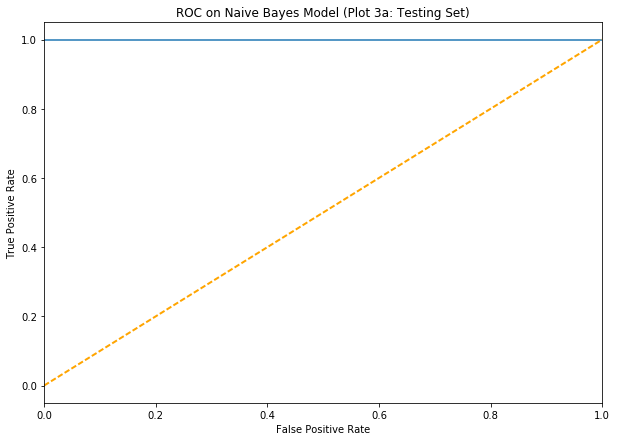

In [238]:
#Run the roc_curve function to find out False_positive, True_positive and Threshold with preset positive class =1
fpr, tpr, thre = metrics.roc_curve(y_test, y_pre_test,drop_intermediate=True,pos_label=1) #Run the ROC curve function with preset positive class =1
df4=pd.DataFrame(list(zip(fpr, tpr,thre)), columns=['fpr','tpr','Threshold'])
print(df4)
df4.plot(y="tpr", x="fpr", figsize=(10,7))
plt.plot([0, 1], [0, 1], color='orange',lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC on Naive Bayes Model (Plot 3a: Testing Set)")
plt.legend().remove()
plt.show()

   fpr  tpr  Threshold
0  0.0  1.0   1.000000
1  1.0  1.0   0.333333


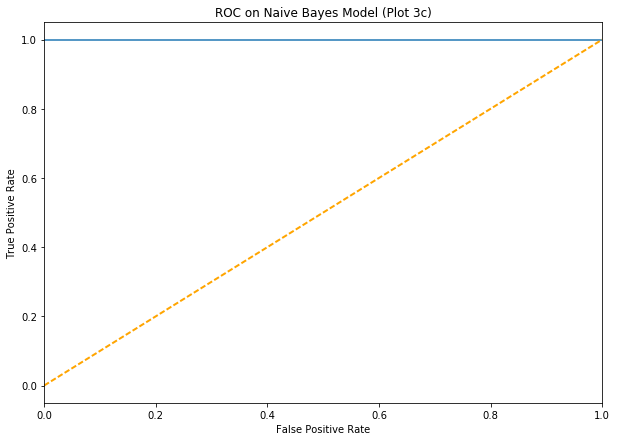

In [239]:
#Run the roc_curve function to find out False_positive, True_positive and Threshold with preset positive class =1
fpr, tpr, thre = metrics.roc_curve(y_train, y_pre_train,drop_intermediate=True,pos_label=1) 
#Put all the variables into the dataframe
df6=pd.DataFrame(list(zip(fpr, tpr,thre)), columns=['fpr','tpr','Threshold'])
print(df6)
df6.plot(y="tpr", x="fpr", figsize=(10,7))
plt.plot([0, 1], [0, 1], color='orange',lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC on Naive Bayes Model (Plot 3c)")
plt.legend().remove()
plt.show()


##Problem-3-c: Lift Curve

Ans:

Based on the analysis below, the minimum cost of data acquisition would be about 26.8% to get at least 80% Accuracy ( The proportion of the total number of predictions that were correct) on the Training. For the Testing data, the minimum cost of data acquisition would be about 26.8% to get at least 80% Accuracy

In [276]:
#Create the Table for Scores and Target
gain_df = pd.DataFrame(list(zip(y_pre_train,y_train)), columns=["Score", "Target"])
gain_df = gain_df.sort_values(by=["Score"], ascending=False) #Sorted by Score (Probability) of intance. 
print("Gain Chart size is ",gain_df.shape)
gain_df.head(3)

Gain Chart size is  (117, 2)


,Score,Target
68,1.0,1
91,1.0,1
24,1.0,1


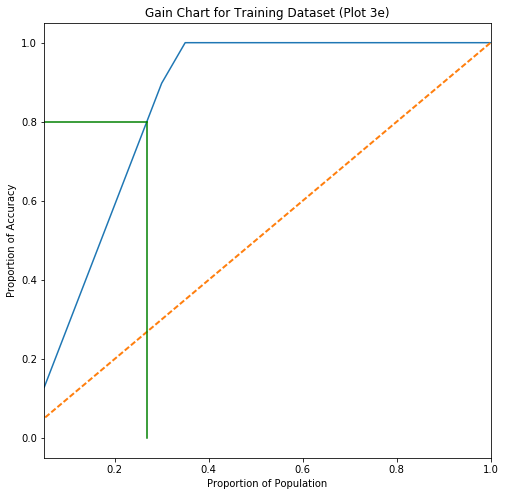

In [277]:
tot_pos = gain_df[gain_df['Target']==1].shape[0] #Total number of Positive Cases
sum1=0
gain_lst=[]

for i in np.arange(0.05,1.001,0.05): #Set 5% increment of proportion of dataset up to 100%
    records = int(gain_df.shape[0]*i)
    sum1 = sum(gain_df['Target'].iloc[0:records])
    gain_lst.append(sum1/tot_pos)

df8 = pd.DataFrame(gain_lst, columns=["Target"], index=np.arange(0.05,1.001,0.05))
df8.plot(y="Target", figsize=(8,8))
plt.plot((0,1),(0,1), lw=2, linestyle = "--")
plt.plot((0,0.268), (0.8,0.8), color="green")
plt.plot((0.268,0.268), (0,0.8), color="green")
plt.title("Gain Chart for Training Dataset (Plot 3e)")
plt.xlabel("Proportion of Population")
plt.ylabel("Proportion of Accuracy")
plt.legend().remove()
plt.show()

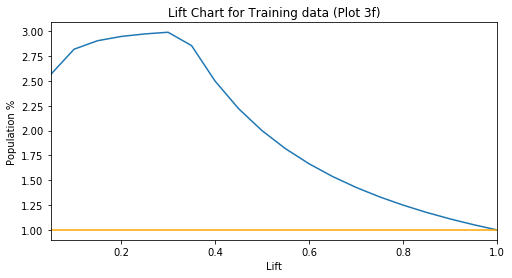

In [278]:
#Create the Lift Chart
lift_per = np.arange(0.05,1.001,0.05) #Set the population 
lift_lst = (list( map(lambda a,b : a/b, gain_lst,lift_per))) #Calculate the Lift Ratio
df11 = pd.DataFrame(list(zip(lift_per,lift_lst)), columns=("Population_Percent","Lift"))
df11.plot(y="Lift", x="Population_Percent", figsize=(8,4))
plt.plot((0,1),(1,1), color="orange")
plt.legend().remove()
plt.xlabel("Lift")
plt.ylabel("Population %")
plt.title("Lift Chart for Training data (Plot 3f)")
plt.show()

In [279]:
gain_df = pd.DataFrame(list(zip(y_pre_test,y_test)), columns=["Score", "Target"])
gain_df = gain_df.sort_values(by=["Score"], ascending=False)
print("Gain Chart size is ",gain_df.shape)
gain_df.head(3)

Gain Chart size is  (61, 2)


,Score,Target
18,1.0,1
11,1.0,1
26,1.0,1


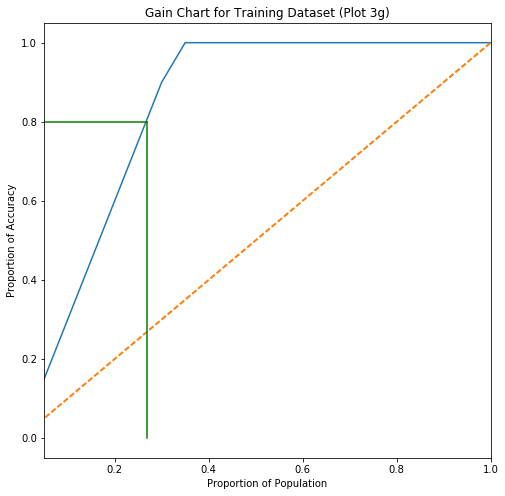

In [280]:
tot_pos = gain_df[gain_df['Target']==1].shape[0] #Total number of Positive Cases
sum1=0
gain_lst=[]

for i in np.arange(0.05,1.001,0.05):    
    records = int(gain_df.shape[0]*i)
    sum1 = sum(gain_df['Target'].iloc[0:records])
    gain_lst.append(sum1/tot_pos)

df9 = pd.DataFrame(gain_lst, columns=["Target"], index=np.arange(0.05,1.001,0.05))
df9.plot(y="Target", figsize=(8,8))
plt.plot((0,1),(0,1), lw=2, linestyle = "--")
plt.plot((0,0.268),(0.8,0.8),color="green")
plt.plot((0.268,0.268),(0,0.8),color="green")
plt.title("Gain Chart for Training Dataset (Plot 3g)")
plt.xlabel("Proportion of Population")
plt.ylabel("Proportion of Accuracy")
plt.legend().remove()
plt.show()

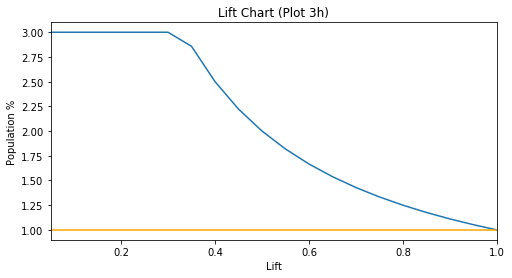

In [281]:
#Create the Lift Chart
lift_per = np.arange(0.05,1.001,0.05) #Set the population 
lift_lst = (list( map(lambda a,b : a/b, gain_lst,lift_per))) #Calculate the Lift Ratio
df11 = pd.DataFrame(list(zip(lift_per,lift_lst)), columns=("Population_Percent","Lift"))
df11.plot(y="Lift", x="Population_Percent", figsize=(8,4))
plt.plot((0,1),(1,1), color="orange")
plt.legend().remove()
plt.xlabel("Lift")
plt.ylabel("Population %")
plt.title("Lift Chart (Plot 3h)")
plt.show()

##Problem-4: Bagging Classifier ( Decision Tree)

In [325]:
wdbc = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data", 
                   header=None)
print("Shape of the downloaded Table is",wdbc.shape)
wdbc.head(3)

Shape of the downloaded Table is (569, 32)


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [328]:
y=wdbc.ix[:,1] # Assign the predictor variables to the x table
X=wdbc.ix[:,2:] # Assign the Class labels to the y table
print(X.head(3)) #Check the first 2 ros of x table
print(y.value_counts()) #Count the quantities of each class labels

X=np.array(X)
y=np.array(y)

      2      3      4       5        6        7       8        9       10  \
0  17.99  10.38  122.8  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
1  20.57  17.77  132.9  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
2  19.69  21.25  130.0  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   

        11   ...        22     23     24      25      26      27      28  \
0  0.07871   ...     25.38  17.33  184.6  2019.0  0.1622  0.6656  0.7119   
1  0.05667   ...     24.99  23.41  158.8  1956.0  0.1238  0.1866  0.2416   
2  0.05999   ...     23.57  25.53  152.5  1709.0  0.1444  0.4245  0.4504   

       29      30       31  
0  0.2654  0.4601  0.11890  
1  0.1860  0.2750  0.08902  
2  0.2430  0.3613  0.08758  

[3 rows x 30 columns]
B    357
M    212
Name: 1, dtype: int64


##Problem-4-a:

Ans:

According to the analysis below, I would propose the number of Trees in the Bagging Classifiers with Decision Tree model is 20. The following analysis uses TWO methods to predict the result. The first mehtod was performed by cross_val_score from the model_selection library which returns the average score of classifier from cross validation method, and then I manually calculate the average accuracy of the classifier based on the number of Trees. The second method was performed by the regular Bagging classifier method to find the accuracy of Training and Testing data, and then find out the best point in terms of accuarcy. 

The reason I picked 20 trees as the optimal in the ensemble due to 1.) the complexity of the model, the less tree we use, the less complex of the model is. The complexity of model could affect the time consummed and accuracy, so that it is very important. 2.) The point of 20 trees is the knee of the Training and Testing accuracy plot which means that the accuracy does NOT increase a lot beyond this point. In other words, the accuracy would not be push a lot even we add more trees to the classifier, so that we should keep the complexity of the model as simple as we can. 

In [286]:
#Split the train set, test set, train class, test class
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, #Predictor Variables
                                                 y, #Class labels
                                                 stratify=y, #data is split in a stratified fashion, using this as the class labels
                                                 test_size=0.34,#Test size is set as 34% of entire set
                                                 random_state=2) # Set the randon state for spliting data  in same order

In [287]:
import pandas as pd
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.cross_validation import KFold

#Set up the function to calculate the Bagging Classifier
def bagging_acc (X, y, clf, seed, kFold_split, num_trees):
    kfold = model_selection.KFold(n_splits=kFold_split, shuffle=True,random_state=seed) #Cross-Validation with 10 Fold
    model = BaggingClassifier(base_estimator=clf, n_estimators=num_trees, random_state=seed) #Using BaggingClassifier with Base Model : Decision Tree
    results = model_selection.cross_val_score(model, X, y, cv=kfold) #Calculate out he Cross Validation Score
    return results.mean() #return the Mean Value

In [324]:
import time
#Preset parameters and execute the Bagging Accuracy Function
clf = DecisionTreeClassifier()
seed = 28
kFold_split=10 #Setup kFold 
max_num_trees=100 #Set up the number of times of iteration for executing the Bagging Classifier function
acc_lst=[]
start = time.time()
for num_trees in range(1,max_num_trees):
    acc = bagging_acc (X, y, clf, seed, kFold_split, num_trees)
    acc_lst.append(acc)
end = time.time()
print("Consumed time is %0.2f Seconds" %(end-start))

Consumed time is 227.66 Seconds


The Algorithm obtains the maximum Scores with the minimum of Trees
    num_Trees  Accuracy
39         40  0.952538


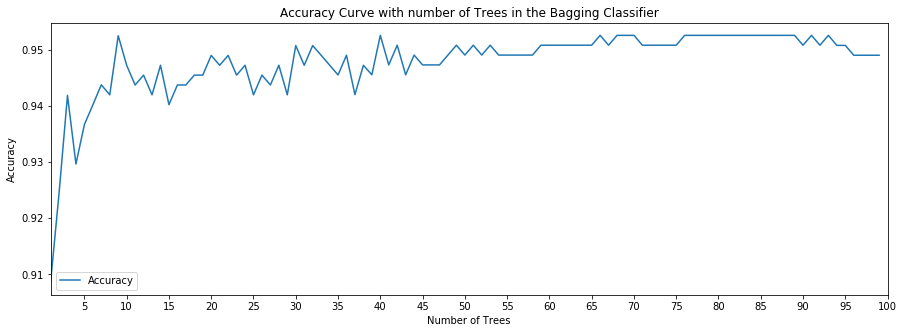

In [313]:
import pylab as plt
Acc_table = pd.DataFrame(list(zip(np.arange(1,100,1),acc_lst)), columns=['num_Trees','Accuracy'])
Acc_table2 = Acc_table[Acc_table['Accuracy']== max(Acc_table['Accuracy'])]
print("The Algorithm obtains the maximum Scores with the minimum of Trees")
print(Acc_table2[Acc_table2['num_Trees']== min(Acc_table2['num_Trees'])])

Acc_table.plot(x='num_Trees', y="Accuracy", figsize=(15,5))
plt.xticks(np.arange(5,101,5))
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve with number of Trees in the Bagging Classifier")
#axes.set_xticklabels(np.arange(1,101,5))
plt.show()

The Algorithm obtains the Minimum Error with the minimum of Trees
   num_Trees     Error
0          1  0.091447


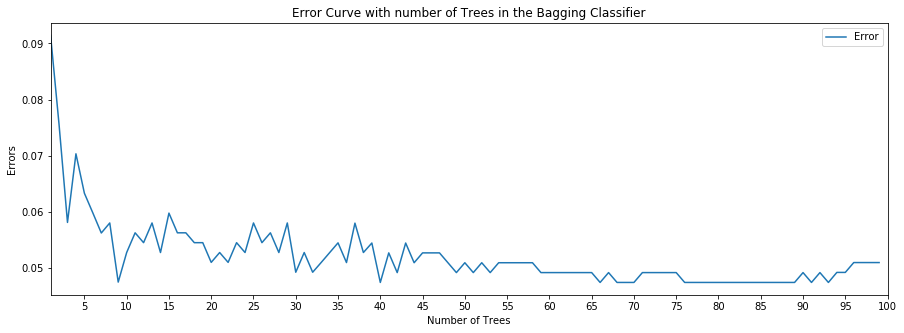

In [312]:
err_lst = list(map(lambda x,y: x-y,np.ones(len(acc_lst)),acc_lst))

Err_table = pd.DataFrame(list(zip(np.arange(1,100,1),err_lst)), columns=['num_Trees','Error'])
Err_table2 = Err_table[Err_table['Error']== max(Err_table['Error'])]
print("The Algorithm obtains the Minimum Error with the minimum of Trees")
print(Err_table2[Err_table2['num_Trees']== min(Err_table2['num_Trees'])])

Err_table.plot(x='num_Trees', y="Error", figsize=(15,5))
plt.xticks(np.arange(5,101,5))
plt.title("Error Curve with number of Trees in the Bagging Classifier")
plt.xlabel("Number of Trees")
plt.ylabel("Errors")
#axes.set_xticklabels(np.arange(1,101,5))
plt.show()

In [290]:
#Now we test the Accuracy for the max

clf = DecisionTreeClassifier()
num_trees=40
random_state=0

#Split the train set, test set, train class, test class
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, #Predictor Variables
                                                 y, #Class labels
                                                 stratify=y, #data is split in a stratified fashion, using this as the class labels
                                                 test_size=0.34,#Test size is set as 34% of entire set
                                                 random_state=25) # Set the randon state for spliting data  in same order

model = BaggingClassifier(base_estimator=clf, n_estimators=num_trees, random_state=seed)
model.fit(x_train, y_train)
y_pre = model.predict(x_test)

print("Training Score with %d is %0.6f"%(num_trees,model.score(x_train,y_train)))
print("Testing Score with %d is %0.6f"%(num_trees, accuracy_score(y_test,y_pre)))


Training Score with 40 is 1.000000
Testing Score with 40 is 0.963918


In [291]:
def calc_params(X, y, clf, param_values, param_name, K):
    # initialize training and testing scores with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    for i, param_value in enumerate(param_values):
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        model=BaggingClassifier().set_params(**{param_name:param_value, 
                                          "base_estimator":clf, 
                                          "random_state":7
                                         })
        
        # create KFold cross validation
        cv = KFold(len(X), K, shuffle=True, random_state=10)
        
        for j, (train,test) in enumerate(cv):
            #model = BaggingClassifier(base_estimator=clf, n_estimators=num_trees, random_state=7)
            #model.fit(x_train, y_train)
            model.fit([X[k] for k in train],y[train])
            k_train_scores[j] = model.score([X[k] for k in train],y[train])
            k_test_scores[j] = model.score([X[k] for k in test],y[test])
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
        
     # plot the training and testing scores in a log scale
    plt.figure(figsize = (10,5))
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='Test', alpha=0.4, lw=2, c='g')
    plt.title("Accuracy Plot on Bagging Classifier with Number of Tree Classifier as Parameter")
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

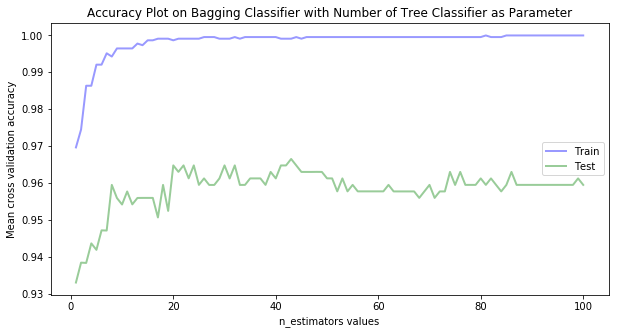

In [292]:
clf = DecisionTreeClassifier()
param_values = np.arange(1,101,1)
param_name = "n_estimators"
K=5
train_scores=[]
test_scores =[]
train_scores, test_scores = calc_params(X, y, clf, param_values, param_name, K)

In [317]:
#Now we test the Accuracy for the max

clf = DecisionTreeClassifier()
num_trees=20
random_state=0

#Split the train set, test set, train class, test class
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, #Predictor Variables
                                                 y, #Class labels
                                                 stratify=y, #data is split in a stratified fashion, using this as the class labels
                                                 test_size=0.34,#Test size is set as 34% of entire set
                                                 random_state=25) # Set the randon state for spliting data  in same order

model = BaggingClassifier(base_estimator=clf, n_estimators=num_trees, random_state=seed)
model.fit(x_train, y_train)
y_pre = model.predict(x_test)

print("Training Score with %d is %0.6f"%(num_trees,model.score(x_train,y_train)))
print("Testing Score with %d is %0.6f"%(num_trees, accuracy_score(y_test,y_pre)))



Training Score with 20 is 1.000000
Testing Score with 20 is 0.953608


##Problem-4-b:

Ans:

Based on the visualization below, we could observe that the variation of predictor variables are large. In this case, I would say that Bagging Classifier is an appropriate choice for the classification. The reason for this because Bagging Machine Learning is designed as Bootstrap Aggregation which means subset of data is randomly sampled with replacement to each classifier. So that the learning process from each classifier with large variation of data could come up large variation of output. At the end of the bagging learning process, the average output (i.e. prediction) from all the bagged classifers could decrease error by decreasing the variance in the results.

Also, we could observe that the number of class labels differs not so much, the M class is about half of class B. So that I believe that Bagging classifier is suitable for this analysis.

B    357
M    212
Name: 1, dtype: int64


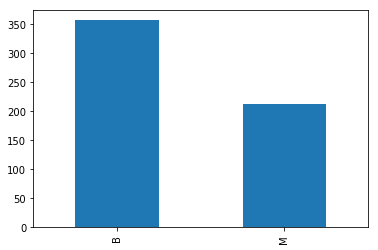

In [334]:
print(wdbc.ix[:,1].value_counts()) #Count the quantities of each class label
wdbc.ix[:,1].value_counts().plot('bar')
plt.show()

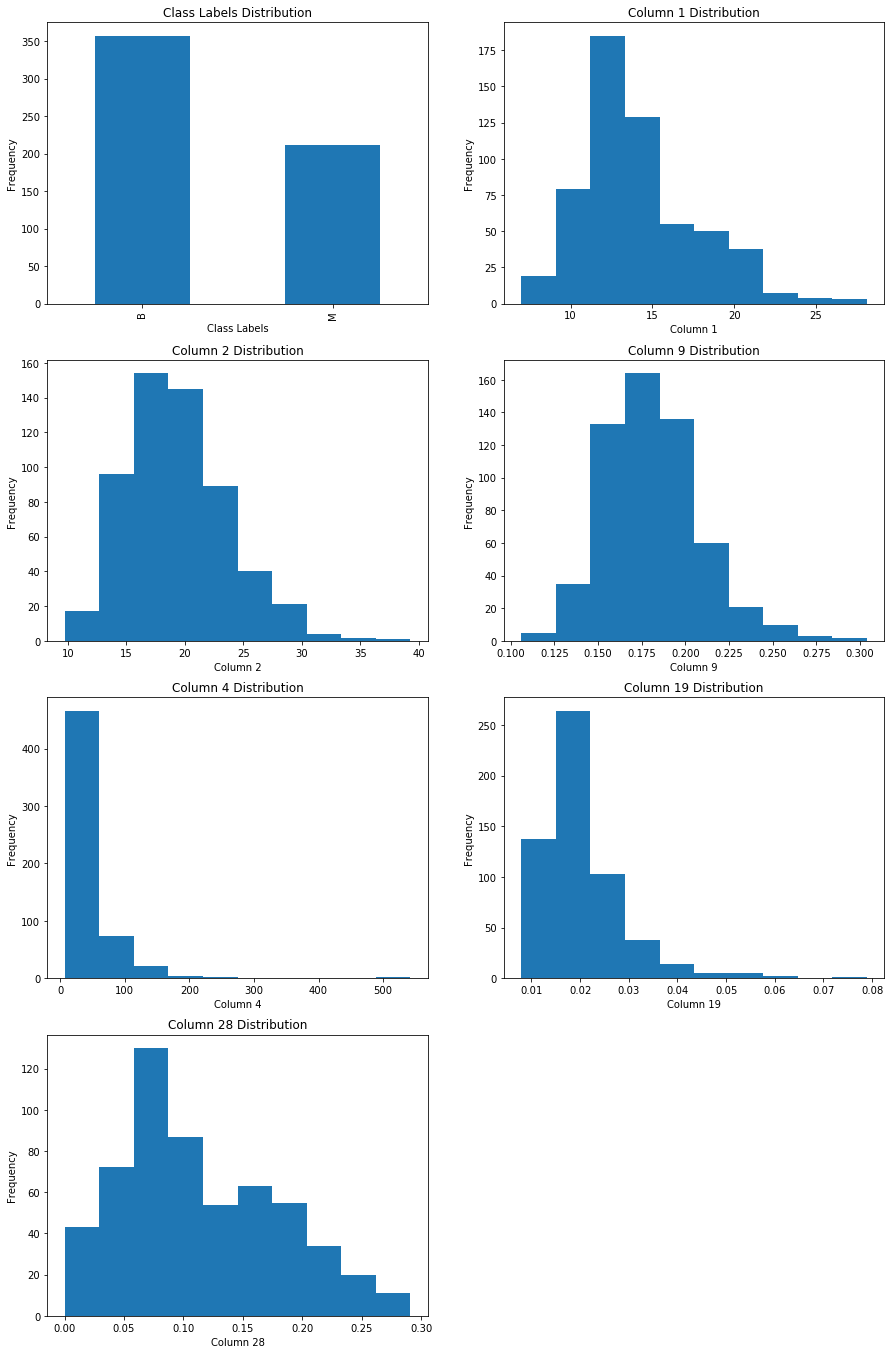

In [133]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize = (15,30))

ax1 = fig.add_subplot(5,2,1)
wdbc[1].value_counts().plot(kind="bar")
ax1.set_title("Class Labels Distribution")
ax1.set_xlabel("Class Labels")
ax1.set_ylabel("Frequency")

ax2 = fig.add_subplot(5,2,2)
wdbc[2].plot(kind="hist")
ax2.set_title("Column 1 Distribution")
ax2.set_xlabel("Column 1")
ax2.set_ylabel("Frequency")

ax3 = fig.add_subplot(5,2,3)
wdbc[3].plot(kind="hist")
ax3.set_title("Column 2 Distribution")
ax3.set_xlabel("Column 2")
ax3.set_ylabel("Frequency")

ax4 = fig.add_subplot(5,2,4)
wdbc[10].plot(kind="hist")
ax4.set_title("Column 9 Distribution")
ax4.set_xlabel("Column 9")
ax4.set_ylabel("Frequency")

ax5 = fig.add_subplot(5,2,5)
wdbc[15].plot(kind="hist")
ax5.set_title("Column 4 Distribution")
ax5.set_xlabel("Column 4")
ax5.set_ylabel("Frequency")

ax6 = fig.add_subplot(5,2,6)
wdbc[20].plot(kind="hist")
ax6.set_title("Column 19 Distribution")
ax6.set_xlabel("Column 19")
ax6.set_ylabel("Frequency")


ax7 = fig.add_subplot(5,2,7)
wdbc[29].plot(kind="hist")
ax7.set_title("Column 28 Distribution")
ax7.set_xlabel("Column 28")
ax7.set_ylabel("Frequency")


plt.show()

##Problem-4-c:

Ans:

The Bagging Ensemble Learning is also called Bootstrap Aggregate. The idea is to a certain number of homogeneous machine learning algorithm (e.g. Decision Tree) to train on different sub-set of data (Bootstrap Sampling by primary dataset) on identical weights to generate independent classifier. Then the final result is by voting for classification purpose or by averaging predicted result for regression purpose. The goal of Bagging classifier is to decrease erros by decreasing the variance in the results due to unstable learners (e.g. Decision Trees).

The Boosting Ensemble method is basically used to convert a weak learning algorithm into a strong one. At each of the learning iteration, a new hypothesis is learned from the previous learner and analyizing its data with errors. When data sample is mis-classified wrong, it is re-weighted (weight is increased). Then the next learner (hypothesis) will be more likely to classify it sameple corretly. the final classification is based on the weighted vote of weak classifier. For example, In every learning iteration, we could fit in sequential trees to classify instances which were classified wrong by the previous tree model, the aim for that is to reduce the error rate from the previous tree. 



##Extra Credit: Red winered data (Repeat Problem 2)

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [135]:
winered_red = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", 
                      sep=";")

print(winered_red.shape) #Check the dimenisions of winered dataset
winered_red.head(3) #Check the top lines 

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [136]:
#Check the number of each class labels
winered_red.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [137]:
#Assign predictor variables to new table
X=winered_red.ix[:,0:-1]
X.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [138]:
#Assign Target Class labels to a new table
y=winered_red.ix[:,-1]
y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [139]:
train_size_lst = np.arange(0.25,0.86,0.1) #Preset Size of Training Data
DT_train_score_lst=[] #Preset the Train score list
DT_test_score_lst=[] #Preset the Test score list

for i in train_size_lst:

    #Split the train set, test set, train class, test class
    from sklearn.cross_validation import train_test_split
    x_train,x_test,y_train,y_test = train_test_split(X, #Predictor Variables
                                                     y, #Class labels
                                                     stratify=y, #data is split in a stratified fashion, using this as the class labels
                                                     test_size=1-i,#Iterating the size of Training data set
                                                     random_state=28) # Set the randon state for spliting data  in same order

    #Set up Decision Tree classifier with the optimal setting from Assignment #1
    treeclf = tree.DecisionTreeClassifier(criterion = "gini", 
                                          random_state = 55)
                                          #max_depth=3, 
                                          #min_samples_leaf=2)
    #Plug in the train dataset with target class
    treeclf = treeclf.fit(x_train, y_train)
    #Predict y value on testing data
    y_pre = treeclf.predict(x_test)

    #Calculate the Accuracy Score of the Training and Testing Set
    DT_train_score_lst.append(treeclf.score(x_train, y_train))
    DT_test_score_lst.append(accuracy_score(y_test, y_pre))

treeclf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=55, splitter='best')

In [140]:
train_size_lst = np.arange(0.25,0.86,0.1) #Preset Size of Training Data
nb_train_score_lst=[] #Preset the Train score list
nb_test_score_lst=[] #Preset the Test score list

for i in train_size_lst:

    #Split the train set, test set, train class, test class
    from sklearn.cross_validation import train_test_split
    x_train,x_test,y_train,y_test = train_test_split(X, #Predictor Variables
                                                     y, #Class labels
                                                     stratify=y, #data is split in a stratified fashion, using this as the class labels
                                                     test_size=1-i,#Iterating the size of Training data set
                                                     random_state=28) # Set the randon state for spliting data  in same order

   #Set up Naive Bayes classifier with ALL default setting
    nbclf = naive_bayes.GaussianNB()
    #Plug in the 66% of training set of data
    nbclf=nbclf.fit(x_train,y_train)
    #Predict y value on testing data
    y_pre = nbclf.predict(x_test)

    #Calculate the Accuracy Score of the Training and Testing Set
    nb_train_score_lst.append(nbclf.score(x_train, y_train))
    nb_test_score_lst.append(accuracy_score(y_test, y_pre))

In [141]:
df2 = pd.DataFrame(list(zip(DT_train_score_lst, DT_test_score_lst,nb_train_score_lst,nb_test_score_lst)), 
             columns = ['DT_train_Acc','DT_test_Acc','nb_train_Acc','nb_test_Acc'],
            index = np.arange(0.25,0.86,0.1))
print("The size of Accuracy Table",df2.shape)
df2

The size of Accuracy Table (7, 4)


,DT_train_Acc,DT_test_Acc,nb_train_Acc,nb_test_Acc
0.25,1.0,0.535000,0.491228,0.449167
0.35,1.0,0.525000,0.531306,0.505769
0.45,1.0,0.527273,0.553547,0.552273
0.55,1.0,0.600000,0.566553,0.558333
0.65,1.0,0.614286,0.570741,0.567857
0.75,1.0,0.600000,0.556297,0.567500
0.85,1.0,0.641667,0.562178,0.566667


(7, 4)
      DT_Resubstition_Err  DT_Generalization_Err  nb_Resubstition_Err  \
0.25                  0.0               0.465000             0.508772   
0.35                  0.0               0.475000             0.468694   
0.45                  0.0               0.472727             0.446453   
0.55                  0.0               0.400000             0.433447   
0.65                  0.0               0.385714             0.429259   
0.75                  0.0               0.400000             0.443703   
0.85                  0.0               0.358333             0.437822   

      nb_Generalization_Err  
0.25               0.550833  
0.35               0.494231  
0.45               0.447727  
0.55               0.441667  
0.65               0.432143  
0.75               0.432500  
0.85               0.433333  


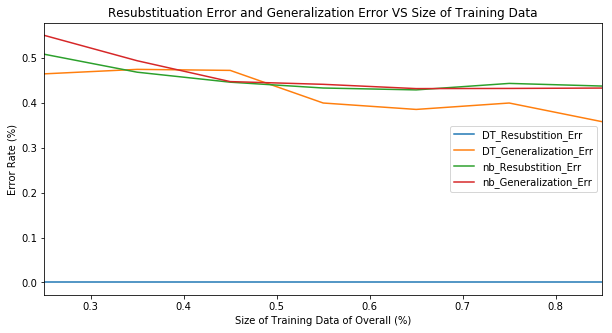

In [142]:
df3=np.ones(df2.shape)
df3=pd.DataFrame(df3, index = np.arange(0.25,0.86,0.1) )
Err_df= pd.DataFrame(df3.values-df2.values, 
                     index= np.arange(0.25,0.86,0.1), 
                     columns = ['DT_Resubstition_Err',
                                'DT_Generalization_Err',
                                'nb_Resubstition_Err',
                                'nb_Generalization_Err'])
print(Err_df.shape)
print(Err_df)

Err_df.plot(x=Err_df.index.values, figsize=(10,5))
plt.title("Resubstituation Error and Generalization Error VS Size of Training Data")
plt.xlabel("Size of Training Data of Overall (%)")
plt.ylabel("Error Rate (%)")
plt.show()

##Extra Credit: White winered data (Repeat Problem 2)

In [143]:
winered_white = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", 
                      sep=";")

print(winered_white.shape) #Check the dimenisions of winered dataset
winered_white.head(3) #Check the top lines 

(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [144]:
#Check the number of Class labels
winered_white.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [145]:
#Assign predictor variables to new table
X=winered_white.ix[:,0:-1]
X.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [146]:
#Assign Target Class labels to a new table
y=winered_white.ix[:,-1]
y.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [147]:
train_size_lst = np.arange(0.25,0.86,0.1) #Preset Size of Training Data
DT_train_score_lst=[] #Preset the Train score list
DT_test_score_lst=[] #Preset the Test score list

for i in train_size_lst:

    #Split the train set, test set, train class, test class
    from sklearn.cross_validation import train_test_split
    x_train,x_test,y_train,y_test = train_test_split(X, #Predictor Variables
                                                     y, #Class labels
                                                     stratify=y, #data is split in a stratified fashion, using this as the class labels
                                                     test_size=1-i,#Iterating the size of Training data set
                                                     random_state=28) # Set the randon state for spliting data  in same order

    #Set up Decision Tree classifier with the optimal setting from Assignment #1
    treeclf = tree.DecisionTreeClassifier(criterion = "gini", 
                                          random_state = 28)
                                          #max_depth=3, 
                                          #min_samples_leaf=2)
    #Plug in the train dataset with target class
    treeclf = treeclf.fit(x_train, y_train)
    #Predict y value on testing data
    y_pre = treeclf.predict(x_test)

    #Calculate the Accuracy Score of the Training and Testing Set
    DT_train_score_lst.append(treeclf.score(x_train, y_train))
    DT_test_score_lst.append(accuracy_score(y_test, y_pre))

treeclf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=28, splitter='best')

In [148]:
train_size_lst = np.arange(0.25,0.86,0.1) #Preset Size of Training Data
nb_train_score_lst=[] #Preset the Train score list
nb_test_score_lst=[] #Preset the Test score list

for i in train_size_lst:

    #Split the train set, test set, train class, test class
    from sklearn.cross_validation import train_test_split
    x_train,x_test,y_train,y_test = train_test_split(X, #Predictor Variables
                                                     y, #Class labels
                                                     stratify=y, #data is split in a stratified fashion, using this as the class labels
                                                     test_size=1-i,#Iterating the size of Training data set
                                                     random_state=28) # Set the randon state for spliting data  in same order

   #Set up Naive Bayes classifier with ALL default setting
    nbclf = naive_bayes.GaussianNB()
    #Plug in the 66% of training set of data
    nbclf=nbclf.fit(x_train,y_train)
    #Predict y value on testing data
    y_pre = nbclf.predict(x_test)

    #Calculate the Accuracy Score of the Training and Testing Set
    nb_train_score_lst.append(nbclf.score(x_train, y_train))
    nb_test_score_lst.append(accuracy_score(y_test, y_pre))

In [149]:
df2 = pd.DataFrame(list(zip(DT_train_score_lst, DT_test_score_lst,nb_train_score_lst,nb_test_score_lst)), 
             columns = ['DT_train_Acc','DT_test_Acc','nb_train_Acc','nb_test_Acc'],
            index = np.arange(0.25,0.86,0.1))
print("The size of Accuracy Table",df2.shape)
df2

The size of Accuracy Table (7, 4)


,DT_train_Acc,DT_test_Acc,nb_train_Acc,nb_test_Acc
0.25,1.0,0.511704,0.467320,0.448285
0.35,1.0,0.529837,0.455659,0.440955
0.45,1.0,0.533036,0.455989,0.438753
0.55,1.0,0.561451,0.451170,0.453515
0.65,1.0,0.590087,0.454917,0.443732
0.75,1.0,0.608163,0.451674,0.434286
0.85,1.0,0.634014,0.449195,0.423129


(7, 4)
      DT_Resubstition_Err  DT_Generalization_Err  nb_Resubstition_Err  \
0.25                  0.0               0.488296             0.532680   
0.35                  0.0               0.470163             0.544341   
0.45                  0.0               0.466964             0.544011   
0.55                  0.0               0.438549             0.548830   
0.65                  0.0               0.409913             0.545083   
0.75                  0.0               0.391837             0.548326   
0.85                  0.0               0.365986             0.550805   

      nb_Generalization_Err  
0.25               0.551715  
0.35               0.559045  
0.45               0.561247  
0.55               0.546485  
0.65               0.556268  
0.75               0.565714  
0.85               0.576871  


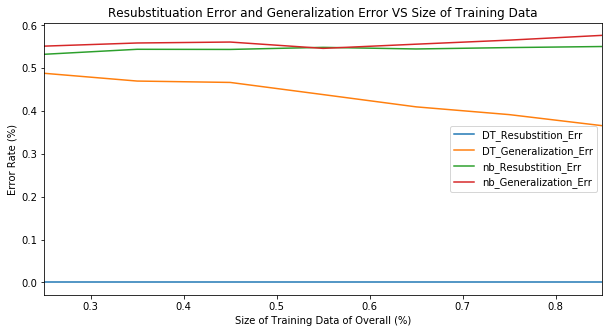

In [150]:
df3=np.ones(df2.shape)
df3=pd.DataFrame(df3, index = np.arange(0.25,0.86,0.1) )
Err_df= pd.DataFrame(df3.values-df2.values, 
                     index= np.arange(0.25,0.86,0.1), 
                     columns = ['DT_Resubstition_Err',
                                'DT_Generalization_Err',
                                'nb_Resubstition_Err',
                                'nb_Generalization_Err'])
print(Err_df.shape)
print(Err_df)

Err_df.plot(x=Err_df.index.values, figsize=(10,5))
plt.title("Resubstituation Error and Generalization Error VS Size of Training Data")
plt.xlabel("Size of Training Data of Overall (%)")
plt.ylabel("Error Rate (%)")
plt.show()

##Extra Credit: banknote data (Repeat Problem 2)

In [151]:
banknote = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt",
                      header=None,
                      names=["variance","skewness","curtosis","entropy","class"])


print(banknote["class"].value_counts())
banknote.head(5)

0    762
1    610
Name: class, dtype: int64


,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [152]:
#Assign predictor variables to new table
X=banknote.ix[:,0:-1]
X.head(5)

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [153]:
#Assign Target Class labels to a new table
y=banknote.ix[:,-1]
y.value_counts()

0    762
1    610
Name: class, dtype: int64

In [154]:
train_size_lst = np.arange(0.25,0.86,0.1) #Preset Size of Training Data
DT_train_score_lst=[] #Preset the Train score list
DT_test_score_lst=[] #Preset the Test score list

for i in train_size_lst:

    #Split the train set, test set, train class, test class
    from sklearn.cross_validation import train_test_split
    x_train,x_test,y_train,y_test = train_test_split(X, #Predictor Variables
                                                     y, #Class labels
                                                     stratify=y, #data is split in a stratified fashion, using this as the class labels
                                                     test_size=1-i,#Iterating the size of Training data set
                                                     random_state=28) # Set the randon state for spliting data  in same order

    #Set up Decision Tree classifier with the optimal setting from Assignment #1
    treeclf = tree.DecisionTreeClassifier(criterion = "gini", 
                                          random_state = 28)
#                                          max_depth=3, 
 #                                         min_samples_leaf=2)
    #Plug in the train dataset with target class
    treeclf = treeclf.fit(x_train, y_train)
    #Predict y value on testing data
    y_pre = treeclf.predict(x_test)

    #Calculate the Accuracy Score of the Training and Testing Set
    DT_train_score_lst.append(treeclf.score(x_train, y_train))
    DT_test_score_lst.append(accuracy_score(y_test, y_pre))

In [155]:
train_size_lst = np.arange(0.25,0.86,0.1) #Preset Size of Training Data
nb_train_score_lst=[] #Preset the Train score list
nb_test_score_lst=[] #Preset the Test score list

for i in train_size_lst:

    #Split the train set, test set, train class, test class
    from sklearn.cross_validation import train_test_split
    x_train,x_test,y_train,y_test = train_test_split(X, #Predictor Variables
                                                     y, #Class labels
                                                     stratify=y, #data is split in a stratified fashion, using this as the class labels
                                                     test_size=1-i,#Iterating the size of Training data set
                                                     random_state=28) # Set the randon state for spliting data  in same order

   #Set up Naive Bayes classifier with ALL default setting
    nbclf = naive_bayes.GaussianNB()
    #Plug in the 66% of training set of data
    nbclf=nbclf.fit(x_train,y_train)
    #Predict y value on testing data
    y_pre = nbclf.predict(x_test)

    #Calculate the Accuracy Score of the Training and Testing Set
    nb_train_score_lst.append(nbclf.score(x_train, y_train))
    nb_test_score_lst.append(accuracy_score(y_test, y_pre))

In [156]:
df2 = pd.DataFrame(list(zip(DT_train_score_lst, DT_test_score_lst,nb_train_score_lst,nb_test_score_lst)), 
             columns = ['DT_train_Acc','DT_test_Acc','nb_train_Acc','nb_test_Acc'],
            index = np.arange(0.25,0.86,0.1))
print("The size of Accuracy Table",df2.shape)
df2

The size of Accuracy Table (7, 4)


,DT_train_Acc,DT_test_Acc,nb_train_Acc,nb_test_Acc
0.25,1.0,0.957240,0.836735,0.816327
0.35,1.0,0.975336,0.839583,0.825112
0.45,1.0,0.970861,0.834684,0.837086
0.55,1.0,0.972492,0.835544,0.839806
0.65,1.0,0.975052,0.830527,0.846154
0.75,1.0,0.965116,0.829767,0.854651
0.85,1.0,0.975728,0.833619,0.859223


(7, 4)
      DT_Resubstition_Err  DT_Generalization_Err  nb_Resubstition_Err  \
0.25                  0.0               0.042760             0.163265   
0.35                  0.0               0.024664             0.160417   
0.45                  0.0               0.029139             0.165316   
0.55                  0.0               0.027508             0.164456   
0.65                  0.0               0.024948             0.169473   
0.75                  0.0               0.034884             0.170233   
0.85                  0.0               0.024272             0.166381   

      nb_Generalization_Err  
0.25               0.183673  
0.35               0.174888  
0.45               0.162914  
0.55               0.160194  
0.65               0.153846  
0.75               0.145349  
0.85               0.140777  


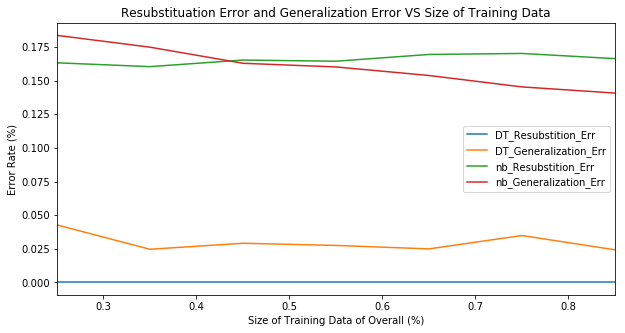

In [157]:
df3=np.ones(df2.shape)
df3=pd.DataFrame(df3, index = np.arange(0.25,0.86,0.1) )
Err_df= pd.DataFrame(df3.values-df2.values, 
                     index= np.arange(0.25,0.86,0.1), 
                     columns = ['DT_Resubstition_Err',
                                'DT_Generalization_Err',
                                'nb_Resubstition_Err',
                                'nb_Generalization_Err'])
print(Err_df.shape)
print(Err_df)

Err_df.plot(x=Err_df.index.values, figsize=(10,5))
plt.title("Resubstituation Error and Generalization Error VS Size of Training Data")
plt.xlabel("Size of Training Data of Overall (%)")
plt.ylabel("Error Rate (%)")
plt.show()

##Extra Credit: banknote data (Repeat Problem 2)

Ans

Based on the above analysis on the banknote dataset, we could observe that the error rate on the Descision Tree performs a lot better than the Naive Bayes Model. When we look at the error rates on the D.T Model, the Resubstition Error on training dataset is almost ZERO which means this analysis on Training set is almost perfect, the Error Rate on Testing set is very flat throughout the increments of the size of Training set, but the gap (2.5%) of Resubstition error and Generalization Error is small enough to be considered a very acceptable result.

On the other hand, the result on the Naive Bayes Model is not as good as the Decision Tree Model. First of all, the Resubstitution error is larger than the Generalization error after pass the 43% of Training Data Samples. This incident might imply that the model has underfitting problem. According to the above, I would propose to choose the Decision Tree Model for the final answer. Also, The above classification result from Decision Tree is a lot better than Naive Bayes might be due to lesser Class Labels are required to be classified in this Dataset. We should try to use Ensemble Classification technique to further analysis. 

